In [28]:
import pandas as pd
msft = pd.read_csv('./data/MSFT.csv')
msft.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-03-26,90.610001,94.000000,90.400002,93.779999,91.019112,56396800
1,2018-03-27,94.940002,95.139999,88.510002,89.470001,86.835999,56569000
2,2018-03-28,89.820000,91.230003,88.870003,89.389999,86.758347,52501100
3,2018-03-29,90.180000,92.290001,88.400002,91.269997,88.583000,45867500
4,2018-04-02,90.470001,90.879997,87.510002,88.519997,85.913963,48515400


In [29]:
import pandas as pd
from pyalgotrade import strategy
from pyalgotrade.barfeed import yahoofeed
from pyalgotrade.technical import ma, rsi, cross
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

def graph_stock(stock):
    """
    Graphs the Stock stock
    :param symbol: Stock Ticket Symbol
    :return: None
    """
    plt.xticks(rotation=45)
    stock_open_price = pd.Series(stock['Open'].to_numpy(), index=pd.date_range(stock['Date'].iloc[0], periods=503, freq='D'))
    stock_close_price = pd.Series(stock['Close'].to_numpy(), index=pd.date_range(stock['Date'].iloc[0], periods=503, freq='D'))
    stock_open_price_ma = stock_open_price.rolling(20).mean()
    stock_open_price_mstd = stock_open_price.rolling(20).std()

    plt.plot(stock_open_price.index, stock_open_price, 'g')
    plt.plot(stock_open_price.index, stock_close_price, '--y')
    plt.plot(stock_open_price_ma.index, stock_open_price_ma , 'b')
    plt.fill_between(stock_open_price_mstd.index,
                     stock_open_price_ma - 2 * stock_open_price_mstd,
                     stock_open_price_ma + 2 * stock_open_price_mstd,
                     color='b',
                     alpha=0.2)
    plt.show()

class BuildFeatures(strategy.BacktestingStrategy):
    def __init__(self, feed, instrument):
        strategy.BacktestingStrategy.__init__(self, feed)
        self.__sma = ma.SMA(feed[instrument].getCloseDataSeries(), 15)
        self.__instrument = instrument
        self.cols = ["Date", "Close", "SMA_15"]
        self.features = pd.DataFrame(columns=self.cols)

    def onBars(self, bars):
        bar = bars[self.__instrument]
        # build up this list of signal features
        # right now it's just appending metrics but we can write methods to convert to signals
        technicals = pd.DataFrame([[
                bar.getDateTime(), 
                bar.getClose(),
                self.__sma[-1]
              ]], 
            columns=self.cols)
        self.features = self.features.append(technicals, ignore_index=True)
    
    def onFinish(self, bars):
        # to use this as a features set 
        # return self.featuers
        print(self.features.tail())
        

# Load the yahoo feed from the CSV file
feed = yahoofeed.Feed()
print(feed)
feed.addBarsFromCSV("MSFT", "./data/MSFT.csv")

# Evaluate the strategy with the feed's bars.
features = BuildFeatures(feed, "MSFT")
features.run()


          Date       Close      SMA_15
498 2020-03-18  140.399994  156.088666
499 2020-03-19  142.710007  155.057333
500 2020-03-20  137.350006  153.413334
501 2020-03-23  135.979996  150.959334
502 2020-03-24  148.339996  149.881334


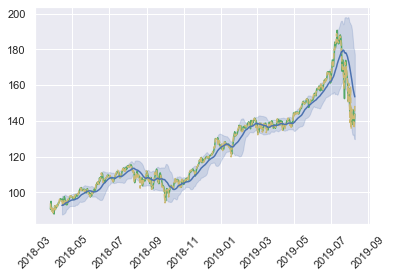

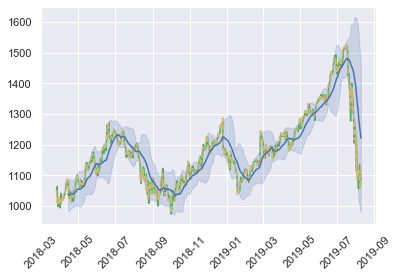

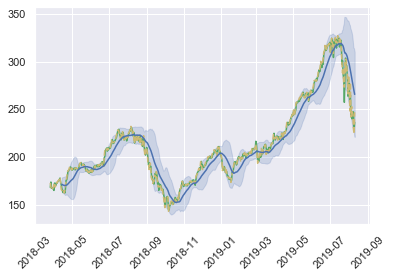

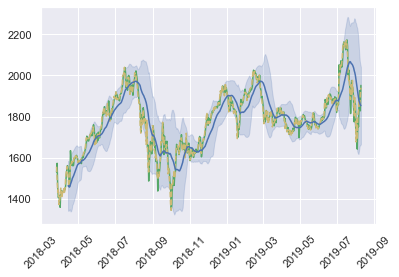

In [30]:
MSFT = pd.read_csv('./data/MSFT.csv')
GOOG = pd.read_csv('./data/GOOG.csv')
AAPL = pd.read_csv('./data/AAPL.csv')
AMZN = pd.read_csv('./data/AMZN.csv')
graph_stock(MSFT)
graph_stock(GOOG)
graph_stock(AAPL)
graph_stock(AMZN)
